In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import pandas as pd

train_df = pd.read_csv("dataset/sign_mnist_train.csv")
test_df = pd.read_csv("dataset/sign_mnist_test.csv")
test = pd.read_csv("dataset/sign_mnist_test.csv")
y = test['label']

## Training

In [8]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [9]:
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [10]:
x_train = train_df.values
x_test = test_df.values

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False
)

datagen.fit(x_train)

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_3 (Bat  (None, 28, 28, 75)        300       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 75)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_4 (Bat  (None, 14, 14, 50)       

In [15]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test), callbacks = [learning_rate_reduction])

Epoch 1/20


215/215 [==============================] - 26s 109ms/step - loss: 1.1017 - accuracy: 0.6594 - val_loss: 3.3697 - val_accuracy: 0.1577 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 24s 112ms/step - loss: 0.2127 - accuracy: 0.9311 - val_loss: 1.4042 - val_accuracy: 0.5442 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 42s 197ms/step - loss: 0.0982 - accuracy: 0.9683 - val_loss: 0.1200 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 43s 199ms/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0473 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 43s 200ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0365 - val_accuracy: 0.9869 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9875
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [===========================

## Evaluation

In [16]:
print(f"Accuracy of the model is: {model.evaluate(x_test,y_test)[1] * 100}%")

225/225 [==============================] - 3s 13ms/step - loss: 0.0025 - accuracy: 0.9993
Accuracy of the model is: 99.9302864074707%


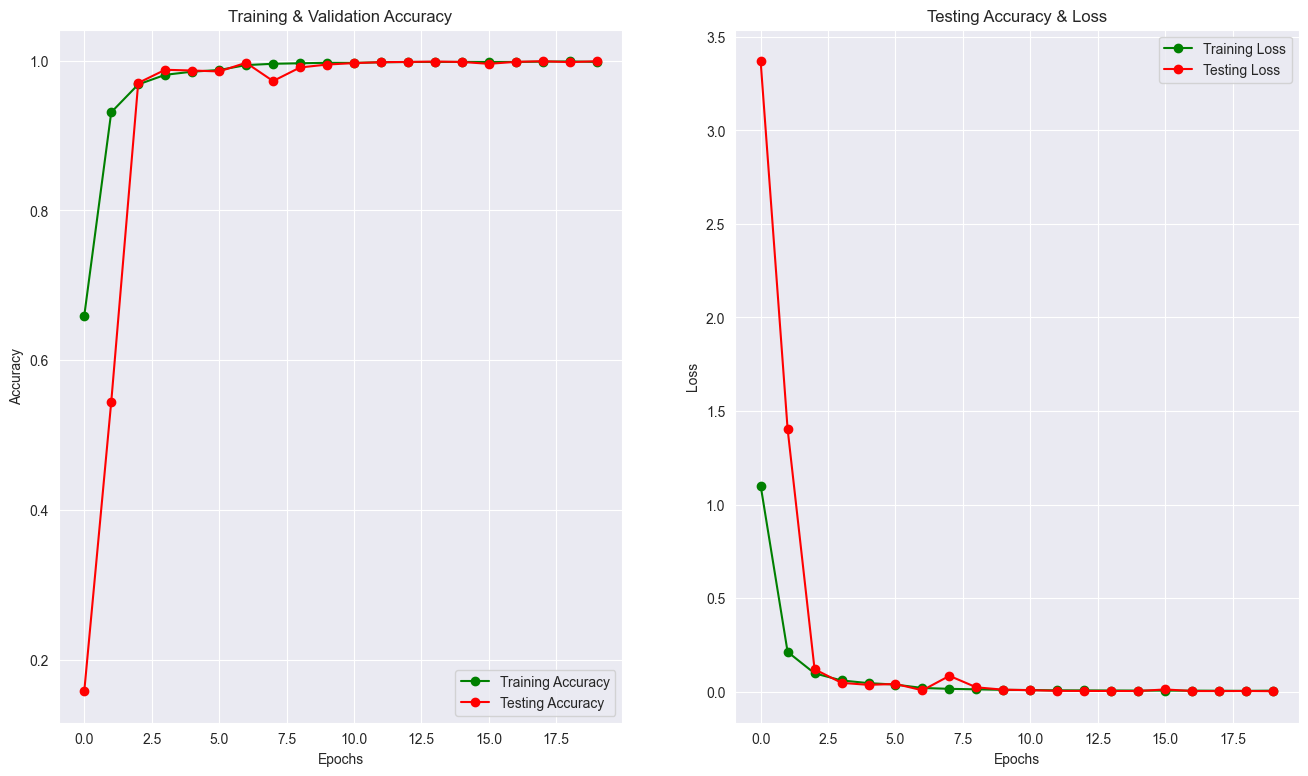

In [18]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss,'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [24]:
predict_x = model.predict(x_test)
predictions = np.argmax(predict_x, axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

225/225 [==============================] - 3s 12ms/step


array([ 6,  5, 10,  0,  3], dtype=int64)

In [26]:
classes = [f"Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names=classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      0.99      0.99       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.99      1.00      0.99       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [28]:
cm = confusion_matrix(y, predictions)
cm = pd.DataFrame(cm, index=[i for i in range(25) if i != 9], columns=[i for i in range(25) if i != 9])

<Axes: >

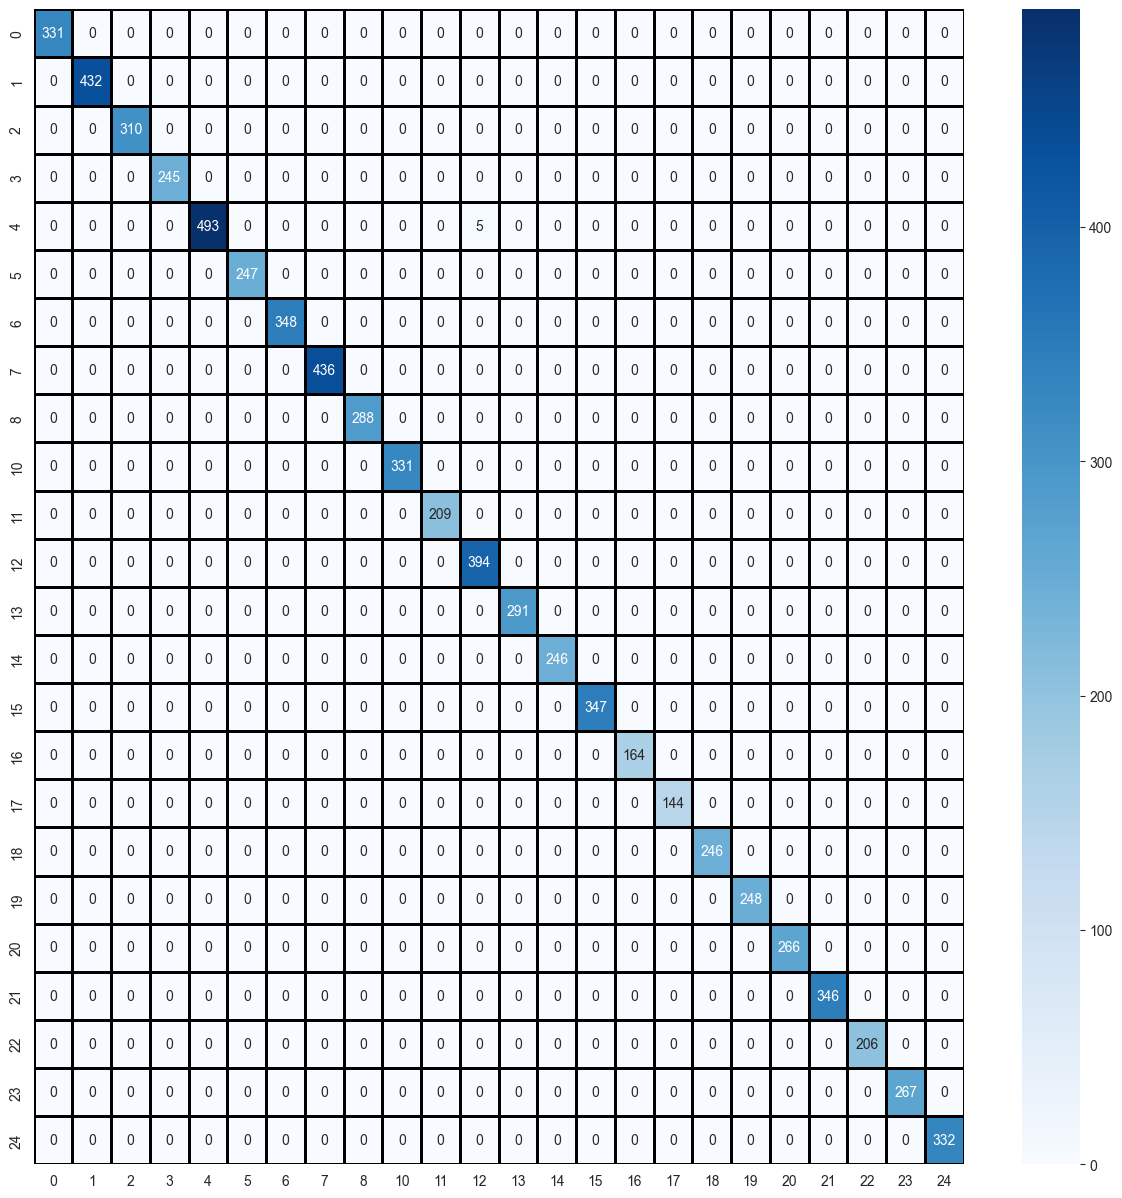

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='')

In [30]:
correct = np.nonzero(predictions == y)[0]

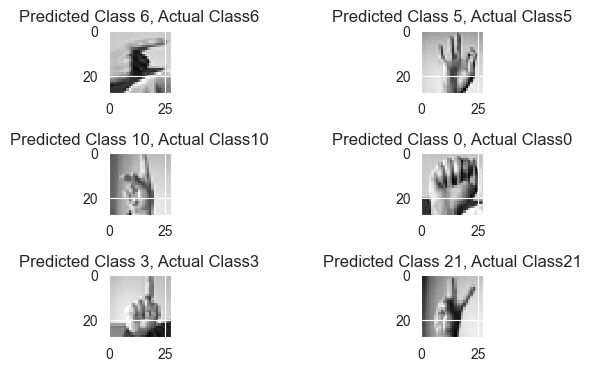

In [32]:
i = 0
for c in correct[:6]:
    plt.subplot(4 ,2, i + 1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {}, Actual Class{}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1